<a href="https://colab.research.google.com/github/hsi88/B-211/blob/main/Final_Project_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install GEOparse


     |████████████████████████████████| 286kB 5.8MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.2-cp36-none-any.whl size=28848 sha256=9fe91eda7c9009b213edec1be524916c6ae4e061cc005559f31710e1c3d13b69
  Stored in directory: /root/.cache/pip/wheels/84/6e/b8/b6497c4f50bde2c3b3f195a470e1bc894312407656896dd6bc
Successfully built GEOparse


In [ ]:
pip install Bio

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 2.3MB 7.2MB/s 


##

# Step 1, database mining


##First: Search on GEO database, using key words: os, AML,
## Return 924 sample results, download each sample info to a txt file. 

In [ ]:
# download all Human acute myeloid leukemia RNA sample with OS signal 

from Bio import Entrez
Entrez.email = "xz87@iu.edu"
Entrez.api_key =  "b3402fd3832b6cecf9240ad40bb6f0661508"
query = 'aml[All Fields] AND os[All Fields] AND "gsm"[Filter]'
handle = Entrez.esearch(db="gds", term=query,  retmax=960)
record = Entrez.read(handle)
gi_list = record
gi_list

{'Count': '924', 'RetMax': '924', 'RetStart': '0', 'IdList': ['301972075', '301972074', '301972073', '301972072', '301972071', '301972070', '301972069', '301972068', '301972067', '301972066', '301972065', '301972064', '301972063', '301972062', '301972061', '301972060', '301972059', '301972058', '301972057', '301972056', '301972055', '301972054', '301972053', '301972052', '301972051', '301972050', '301972049', '301972048', '301972047', '301972046', '301972045', '301972044', '301972043', '301972042', '301972041', '301972040', '301972039', '301972038', '301972037', '301972036', '301972035', '301972034', '301972033', '301972032', '301972031', '301972030', '301972029', '301972028', '301972027', '301972026', '301972025', '301972024', '301972023', '301972022', '301972021', '301972020', '301972019', '301972018', '301972017', '301972016', '301972015', '301972014', '301972013', '301972012', '301972011', '301972010', '301972009', '301972008', '301972007', '301972006', '301972005', '301972004', '3

In [ ]:
# get all of UID number 
import pandas as pd
import numpy as np
id = np.array(gi_list)
nplist = np.ndarray.tolist(id)
nplist = nplist['IdList']
nplist

['301972075', '301972074', '301972073', '301972072', '301972071', '301972070', '301972069', '301972068', '301972067', '301972066', '301972065', '301972064', '301972063', '301972062', '301972061', '301972060', '301972059', '301972058', '301972057', '301972056', '301972055', '301972054', '301972053', '301972052', '301972051', '301972050', '301972049', '301972048', '301972047', '301972046', '301972045', '301972044', '301972043', '301972042', '301972041', '301972040', '301972039', '301972038', '301972037', '301972036', '301972035', '301972034', '301972033', '301972032', '301972031', '301972030', '301972029', '301972028', '301972027', '301972026', '301972025', '301972024', '301972023', '301972022', '301972021', '301972020', '301972019', '301972018', '301972017', '301972016', '301972015', '301972014', '301972013', '301972012', '301972011', '301972010', '301972009', '301972008', '301972007', '301972006', '301972005', '301972004', '301972003', '301972002', '301972001', '301972000', '301971999'

In [ ]:
len(nplist)

924

In [ ]:
# get all GES number 

from Bio import Entrez
import sys 
import time

f = open("geofull.txt", "w")
for i in range(900,924):     
  # get all the number from nplist[1] to nplist[924]
  # needs to run multiple times seperately 
  Entrez.email = "xz87@iu.edu"
  Entrez.api_key =  "b3402fd3832b6cecf9240ad40bb6f0661508"
  handle = Entrez.esummary(db="gds", id=nplist[i])
  record = Entrez.read(handle)
  print(record[0]['Accession'])
handle.close()
  


GSM311784
GSM311783
GSM311782
GSM311781
GSM311780
GSM311779
GSM311778
GSM311777
GSM311776
GSM311775
GSM311774
GSM311773
GSM311772
GSM311771
GSM311770
GSM311769
GSM311768
GSM311767
GSM311766
GSM311765
GSM311764
GSM311763
GSM311762
GSM311761


In [ ]:
# verify the number

import os, os.path

# simple version for working with CWD
print(len([name for name in os.listdir('.') if os.path.isfile(name)]))

# path joining version for other paths
DIR = '/content/drive/MyDrive/Colab Notebooks/geo/'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

6
924


In [ ]:
# from the GEO list input the GSM number to a list
import pandas as pd
geolist =  pd.read_csv('geofull.txt', sep=" ", header=None)
series = pd.Series(geolist[0])
series = series.str.upper()
#geo.values.tolist()
series

0      GSM1972075
1      GSM1972074
2      GSM1972073
3      GSM1972072
4      GSM1972071
          ...    
919     GSM311765
920     GSM311764
921     GSM311763
922     GSM311762
923     GSM311761
Name: 0, Length: 924, dtype: object

In [ ]:
#using the list data,  download all 924 sample file 

import GEOparse
for j in series: 
  gse = GEOparse.get_GEO(geo=j, destdir="/content/drive/MyDrive/Colab Notebooks//geo")

Streaming output truncated to the last 5000 lines.
24-Nov-2020 09:41:17 DEBUG utils - Directory /content/drive/MyDrive/Colab Notebooks/geo already exists. Skipping.
24-Nov-2020 09:41:17 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM1971776&form=text&view=full to /content/drive/MyDrive/Colab Notebooks/geo/GSM1971776.txt
24-Nov-2020 09:41:18 DEBUG downloader - Total size: 0
24-Nov-2020 09:41:18 DEBUG downloader - md5: None
4.03kB [00:00, 668kB/s]
24-Nov-2020 09:41:18 DEBUG downloader - Moving /tmp/tmpxpawh48y to /content/drive/MyDrive/Colab Notebooks/geo/GSM1971776.txt
24-Nov-2020 09:41:18 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM1971776&form=text&view=full
24-Nov-2020 09:41:18 INFO GEOparse - Parsing /content/drive/MyDrive/Colab Notebooks/geo/GSM1971776.txt: 
24-Nov-2020 09:41:18 DEBUG utils - Directory /content/drive/MyDrive/Colab Notebooks/geo already exists. Skipping.
24-Nov-

In [ ]:
# try to analyze the file 

In [ ]:
# try1

In [ ]:
import glob
files = glob.glob( '/content/geo/*.txt' )
with open( 'result.csv', 'w' ) as result:
    for file_ in files:
        for line in open( file_, 'r' ):
            result.write( line )

In [ ]:
import numpy as np

ta = np.loadtxt("/content/geo/GSM1972055.txt",delimiter='\n', dtype=str)
np.char.find(ta, 'os')
se = np.char.find(ta[0:30], 'os')
ta[np.where(se ==30)]

array(['!Sample_characteristics_ch1 = os (as of june 8 2015): 422',
       '!Sample_characteristics_ch1 = os event (as of june 8 2015): Deceased'],
      dtype='<U612')

In [ ]:
import numpy as np

ta = np.loadtxt("/content/result.txt",delimiter='\n', dtype=str)
np.char.find(ta, 'os')
se = np.char.find(ta, 'os')
ta[np.where(se != -1)]

array(['!Sample_characteristics_ch1 = os (as of june 8 2015): 133',
       '!Sample_characteristics_ch1 = os event (as of june 8 2015): Deceased',
       '!Sample_data_processing = Normalized signal intensity for mRNAs were computed by normalizing raw counts data to the spike-in positive, negative controls, and reference genes using the nSolver software (version 2.0.72) from Nanostring Technologies. The output files from nSolver were read into R to access background and to minimize inter-cartridge gene expression variability using control lanes containing synethic oligonucleotides. Normalized expression values were log2 transformed.',
       '!Sample_contact_zip/postal_code = M5S 3E1',
       '!Sample_characteristics_ch1 = flt3-itd: positive',
       '!Sample_characteristics_ch1 = os (as of june 8 2015): 228',
       '!Sample_characteristics_ch1 = os event (as of june 8 2015): Deceased',
       '!Sample_data_processing = Normalized signal intensity for mRNAs were computed by normalizin

array(['^SAMPLE = GSM1972055', '!Sample_title = AML patient 287',
       '!Sample_geo_accession = GSM1972055',
       '!Sample_status = Public on Dec 02 2016',
       '!Sample_submission_date = Dec 14 2015',
       '!Sample_last_update_date = Dec 02 2016', '!Sample_type = RNA',
       '!Sample_channel_count = 1',
       '!Sample_source_name_ch1 = Human acute myeloid leukemia cells',
       '!Sample_organism_ch1 = Homo sapiens', '!Sample_taxid_ch1 = 9606',
       '!Sample_characteristics_ch1 = Sex: Female',
       '!Sample_characteristics_ch1 = age: 54',
       '!Sample_characteristics_ch1 = aml type: de novo',
       '!Sample_characteristics_ch1 = fab: NA',
       '!Sample_characteristics_ch1 = wbc: 203',
       '!Sample_characteristics_ch1 = bm blast %: NA',
       '!Sample_characteristics_ch1 = cytogenetics: 47,XX,+8[4]',
       '!Sample_characteristics_ch1 = cytogenetic risk: intermediate',
       '!Sample_characteristics_ch1 = npm1c: NA'], dtype='<U612')

## Second: filter manualy based on files’ name and size, go to the GEO databse look up the details of ease data series, highlight the one will be using 

##only two series met the requirements, RNA genome data set with OS 
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE12417

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE66525

## we using GSE66525 for further anaysis as example 



# Step 2, data analysis, PCA, gene expresion level in samples

In [1]:
import pandas as pd
import pylab as pl
import seaborn as sns
import GEOparse  
import matplotlib as plt
# download GSE66525 series 
GSE66525 = GEOparse.get_GEO("GSE66525") 

14-Dec-2020 05:07:58 DEBUG utils - Directory ./ already exists. Skipping.
14-Dec-2020 05:07:58 INFO GEOparse - File already exist: using local version.
14-Dec-2020 05:07:58 INFO GEOparse - Parsing ./GSE66525_family.soft.gz: 
14-Dec-2020 05:07:58 DEBUG GEOparse - DATABASE: GeoMiame
14-Dec-2020 05:07:58 DEBUG GEOparse - SERIES: GSE66525
14-Dec-2020 05:07:58 DEBUG GEOparse - PLATFORM: GPL11532
14-Dec-2020 05:07:59 DEBUG GEOparse - SAMPLE: GSM1624440
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624441
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624442
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624443
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624444
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624445
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624446
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624447
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624448
14-Dec-2020 05:08:00 DEBUG GEOparse - SAMPLE: GSM1624449
14-Dec-2020 05:08:00 DEBUG GEOparse 

In [2]:
# get the phenotype info

pGSE66525= GSE66525.phenotype_data
pGSE66525.to_csv("phenotype_GSE12417.csv")
pGSE66525

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,characteristics_ch1.0.Sex,characteristics_ch1.1.age,characteristics_ch1.2.fab type,characteristics_ch1.3.wbc/dg,characteristics_ch1.4.% blasts pb/dg,characteristics_ch1.5.response,characteristics_ch1.6.wbc/r,characteristics_ch1.7.% blasts pb/r,characteristics_ch1.8.months from dg to r,characteristics_ch1.9.os,growth_protocol_ch1,molecule_ch1,extract_protocol_ch1,label_ch1,label_protocol_ch1,hyb_protocol,scan_protocol,data_processing,platform_id,contact_name,contact_email,contact_department,contact_institute,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,series_id,data_row_count
GSM1624440,CN AML patient 1 Dg,GSM1624440,Public on Mar 16 2015,Mar 04 2015,Mar 16 2015,RNA,1,peripheral blood sample from the time of diagn...,Homo sapiens,9606,m,42,M1,"35,000",83,CR,"49,670",57,12,12,"Ficoll purified, vitally frozen primary patien...",total RNA,RNeasy (Quiagen),biotin,Affymetrix standard protocol,Affymetrix standard protocol,Affymetrix standard protocol,RMA,GPL11532,"Rotraud,,Wieser",rotraud.wieser@meduniwien.ac.at,Clinic of Medicine I,Medical University of Vienna,Waehringer Guertel 18-20,Vienna,1090,Austria,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1624...,GSE66525,33297
GSM1624441,CN AML patient 1 R,GSM1624441,Public on Mar 16 2015,Mar 04 2015,Mar 16 2015,RNA,1,peripheral blood sample from relapsed AML,Homo sapiens,9606,m,42,M1,"35,000",83,CR,"49,670",57,12,12,"Ficoll purified, vitally frozen primary patien...",total RNA,RNeasy (Quiagen),biotin,Affymetrix standard protocol,Affymetrix standard protocol,Affymetrix standard protocol,RMA,GPL11532,"Rotraud,,Wieser",rotraud.wieser@meduniwien.ac.at,Clinic of Medicine I,Medical University of Vienna,Waehringer Guertel 18-20,Vienna,1090,Austria,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1624...,GSE66525,33297
GSM1624442,CN AML patient 2 Dg,GSM1624442,Public on Mar 16 2015,Mar 04 2015,Mar 16 2015,RNA,1,peripheral blood sample from the time of diagn...,Homo sapiens,9606,f,47,M5,"33,860",13,CR,"59,420",56,7,8,"Ficoll purified, vitally frozen primary patien...",total RNA,RNeasy (Quiagen),biotin,Affymetrix standard protocol,Affymetrix standard protocol,Affymetrix standard protocol,RMA,GPL11532,"Rotraud,,Wieser",rotraud.wieser@meduniwien.ac.at,Clinic of Medicine I,Medical University of Vienna,Waehringer Guertel 18-20,Vienna,1090,Austria,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1624...,GSE66525,33297
GSM1624443,CN AML patient 2 R,GSM1624443,Public on Mar 16 2015,Mar 04 2015,Mar 16 2015,RNA,1,peripheral blood sample from relapsed AML,Homo sapiens,9606,f,47,M5,"33,860",13,CR,"59,420",56,7,8,"Ficoll purified, vitally frozen primary patien...",total RNA,RNeasy (Quiagen),biotin,Affymetrix standard protocol,Affymetrix standard protocol,Affymetrix standard protocol,RMA,GPL11532,"Rotraud,,Wieser",rotraud.wieser@meduniwien.ac.at,Clinic of Medicine I,Medical University of Vienna,Waehringer Guertel 18-20,Vienna,1090,Austria,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1624...,GSE66525,33297
GSM1624444,CN AML patient 3 Dg,GSM1624444,Public on Mar 16 2015,Mar 04 2015,Mar 16 2015,RNA,1,peripheral blood sample from the time of diagn...,Homo sapiens,9606,f,36,M2,"57,000",85,CR,"127,000",81,13,13,"Ficoll purified, vitally frozen primary patien...",total RNA,RNeasy (Quiagen),biotin,Affymetrix standard protocol,Affymetrix standard protocol,Affymetrix standard protocol,RMA,GPL11532,"Rotraud,,Wieser",rotraud.wieser@meduniwien.ac.at,Clinic of Medicine I,Medical University of Vienna,Waehringer Guertel 18-20,Vienna,1090,Austria,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM1624...,GSE66525,33297
GSM1624445,CN AML patient 3 R,GSM1624445,Public on Mar 16 2015,Mar 04 2015,Mar 16 2015,RNA,1,peripheral blood sample from relapsed AML,Homo sapiens,9606,f,36,M2,"57,000",85,CR,"127,000",81,13,13,"Ficoll purified, vitally frozen primary patien...",total RNA,RNeasy (Quiagen),biotin,

In [3]:
# get the OS info
os_pGSE66525  =  pGSE66525[['title','characteristics_ch1.9.os']]
os_pGSE66525 

,title,characteristics_ch1.9.os
GSM1624440,CN AML patient 1 Dg,12
GSM1624441,CN AML patient 1 R,12
GSM1624442,CN AML patient 2 Dg,8
GSM1624443,CN AML patient 2 R,8
GSM1624444,CN AML patient 3 Dg,13
GSM1624445,CN AML patient 3 R,13
GSM1624446,CN AML patient 4 Dg,15
GSM1624447,CN AML patient 4 R,15
GSM1624448,CN AML patient 5 Dg,>15
GSM1624449,CN AML patient 5 R,>15


In [4]:
# get the expression matrix 

tGSE66525 = GSE66525.pivot_samples('VALUE')
tGSE66525

name,GSM1624440,GSM1624441,GSM1624442,GSM1624443,GSM1624444,GSM1624445,GSM1624446,GSM1624447,GSM1624448,GSM1624449,GSM1624450,GSM1624451,GSM1624452,GSM1624453,GSM1624454,GSM1624455,GSM1624456,GSM1624457,GSM1624458,GSM1624459,GSM1624460,GSM1624461
ID_REF,,,,,,,,,,,,,,,,,,,,,,
7892501,4.457670,5.407738,4.790541,5.859556,6.420122,3.467916,5.945602,6.647825,6.602440,7.229135,3.637332,6.354423,4.321829,6.169275,4.636132,4.611472,2.980701,5.436212,3.120780,4.764621,5.312617,4.977339
7892502,4.427199,4.706075,6.648705,6.555809,5.326105,4.726542,5.866332,6.330180,5.576224,6.265993,4.229606,5.519430,4.841126,5.554683,5.280579,6.274350,5.180041,5.386401,5.098134,5.319798,6.656567,6.375572
7892503,2.296661,2.697503,2.634773,2.468966,2.667819,2.799999,4.385336,4.352859,3.179669,2.448823,2.689426,3.266609,2.424242,2.721640,2.765496,2.981138,3.761813,4.063848,3.375154,3.542427,4.111048,3.856045
7892504,6.201211,7.767061,7.102829,6.464468,6.557683,5.847603,6.988188,6.612647,6.848935,6.630087,7.061368,6.942241,6.284274,6.456510,7.463215,7.238400,6.677724,7.394696,8.270095,7.501183,8.088000,7.210342
7892505,2.394406,3.366315,3.887189,3.043444,2.615397,2.349865,2.709445,2.551947,2.656664,3.450374,2.833395,2.865944,2.539054,2.744303,3.008823,2.999035,3.369821,2.625916,3.129420,3.291229,2.674361,3.142249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180414,3.937308,4.079325,4.260835,4.395160,4.312294,4.706821,4.291802,4.082498,4.184130,3.848446,4.476402,4.197701,4.151364,4.852911,4.906753,4.188932,4.304578,3.972645,4.442738,3.970895,4.276239,4.112554
8180415,6.378118,6.859318,6.441611,7.222579,7.373884,6.683062,7.203112,7.150348,6.832150,7.094118,5.625443,7.154771,6.931281,7.202439,6.895672,6.704082,6.241653,6.704432,6.014679,6.381378,6.586039,6.778594
8180416,3.784392,3.740438,3.636438,3.708041,3.462095,3.882298,3.548469,3.504692,4.030603,3.757730,4.262861,3.367504,4.026371,5.744988,3.352173,3.534421,3.797260,3.735618,5.137160,3.571694,3.814852,3.597385


In [5]:
# drop the row with null value 

new_tGSE66525 = tGSE66525.dropna(axis=0)

In [6]:
new_tGSE66525

name,GSM1624440,GSM1624441,GSM1624442,GSM1624443,GSM1624444,GSM1624445,GSM1624446,GSM1624447,GSM1624448,GSM1624449,GSM1624450,GSM1624451,GSM1624452,GSM1624453,GSM1624454,GSM1624455,GSM1624456,GSM1624457,GSM1624458,GSM1624459,GSM1624460,GSM1624461
ID_REF,,,,,,,,,,,,,,,,,,,,,,
7892501,4.457670,5.407738,4.790541,5.859556,6.420122,3.467916,5.945602,6.647825,6.602440,7.229135,3.637332,6.354423,4.321829,6.169275,4.636132,4.611472,2.980701,5.436212,3.120780,4.764621,5.312617,4.977339
7892502,4.427199,4.706075,6.648705,6.555809,5.326105,4.726542,5.866332,6.330180,5.576224,6.265993,4.229606,5.519430,4.841126,5.554683,5.280579,6.274350,5.180041,5.386401,5.098134,5.319798,6.656567,6.375572
7892503,2.296661,2.697503,2.634773,2.468966,2.667819,2.799999,4.385336,4.352859,3.179669,2.448823,2.689426,3.266609,2.424242,2.721640,2.765496,2.981138,3.761813,4.063848,3.375154,3.542427,4.111048,3.856045
7892504,6.201211,7.767061,7.102829,6.464468,6.557683,5.847603,6.988188,6.612647,6.848935,6.630087,7.061368,6.942241,6.284274,6.456510,7.463215,7.238400,6.677724,7.394696,8.270095,7.501183,8.088000,7.210342
7892505,2.394406,3.366315,3.887189,3.043444,2.615397,2.349865,2.709445,2.551947,2.656664,3.450374,2.833395,2.865944,2.539054,2.744303,3.008823,2.999035,3.369821,2.625916,3.129420,3.291229,2.674361,3.142249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180414,3.937308,4.079325,4.260835,4.395160,4.312294,4.706821,4.291802,4.082498,4.184130,3.848446,4.476402,4.197701,4.151364,4.852911,4.906753,4.188932,4.304578,3.972645,4.442738,3.970895,4.276239,4.112554
8180415,6.378118,6.859318,6.441611,7.222579,7.373884,6.683062,7.203112,7.150348,6.832150,7.094118,5.625443,7.154771,6.931281,7.202439,6.895672,6.704082,6.241653,6.704432,6.014679,6.381378,6.586039,6.778594
8180416,3.784392,3.740438,3.636438,3.708041,3.462095,3.882298,3.548469,3.504692,4.030603,3.757730,4.262861,3.367504,4.026371,5.744988,3.352173,3.534421,3.797260,3.735618,5.137160,3.571694,3.814852,3.597385


In [7]:
# transpose the dataframe for PCA analysis 

new1_tGSE66525 = new_tGSE66525.transpose()
new_tGSE66525 = new1_tGSE66525

In [8]:
new_tGSE66525

ID_REF,7892501,7892502,7892503,7892504,7892505,7892506,7892507,7892508,7892509,7892510,7892511,7892512,7892513,7892514,7892515,7892516,7892517,7892518,7892519,7892520,7892521,7892522,7892524,7892525,7892526,7892527,7892528,7892529,7892530,7892531,7892532,7892533,7892534,7892535,7892536,7892537,7892538,7892539,7892540,7892541,...,8180379,8180380,8180381,8180382,8180383,8180384,8180385,8180386,8180387,8180388,8180389,8180390,8180391,8180392,8180393,8180394,8180395,8180396,8180397,8180398,8180399,8180400,8180401,8180402,8180403,8180404,8180405,8180406,8180407,8180408,8180409,8180410,8180411,8180412,8180413,8180414,8180415,8180416,8180417,8180418
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM1624440,4.457670,4.427199,2.296661,6.201211,2.394406,4.917452,3.116633,4.699903,10.142830,4.916394,3.654030,3.538627,4.018162,9.811774,6.919380,3.279056,5.274880,2.615786,4.369662,7.307878,7.536106,5.561746,3.303809,5.958376,6.134853,7.307249,2.325853,3.093600,7.150973,5.401163,3.178813,6.104824,4.190208,5.184817,11.34253,5.062246,5.569928,5.343199,4.311191,9.195863,...,7.106598,3.311821,3.265245,5.993671,3.812281,5.201854,5.542397,10.934030,10.832360,10.768670,10.810640,6.164906,5.171270,7.818516,7.913493,7.412760,7.400473,8.166441,7.848933,11.00840,3.356919,3.220678,3.394393,10.48203,7.457281,10.410270,6.090268,5.787157,10.366260,10.398750,10.715500,11.33884,10.595520,7.384544,7.072272,3.937308,6.378118,3.784392,7.659700,9.975048
GSM1624441,5.407738,4.706075,2.697503,7.767061,3.366315,6.404492,2.659693,6.728585,10.772010,5.720248,4.276375,4.843583,4.063038,10.234260,9.047991,2.498058,6.920083,3.014663,5.070708,8.306979,7.568051,5.498933,6.034692,6.529152,6.598360,8.042492,2.375523,4.859584,8.764593,6.323153,2.651742,5.696354,5.200249,5.545961,11.60453,3.769920,5.404491,6.619825,4.782613,10.656920,...,8.210766,3.191547,3.277426,6.081663,4.019305,5.479302,6.062995,10.894220,10.893940,10.878770,10.852210,6.794270,5.426736,7.235734,7.510613,7.195480,6.990339,8.426854,8.422645,11.40693,3.529533,2.871748,3.163841,11.20210,7.857065,10.628290,7.739018,5.848478,10.725900,10.778510,11.079340,11.28274,10.581480,7.008754,6.969121,4.079325,6.859318,3.740438,7.453022,9.986099
GSM1624442,4.790541,6.648705,2.634773,7.102829,3.887189,6.480500,2.867043,7.529498,9.577972,6.511471,4.148858,4.420776,3.550281,10.457410,8.755860,2.937972,6.695225,3.205273,4.304536,9.067037,8.040922,5.028819,4.945117,6.397963,6.580016,7.807629,2.089659,4.922194,7.849555,6.237685,3.186643,6.042564,5.514727,6.255673,10.88731,4.017781,5.826864,7.052793,5.140186,10.088430,...,7.253305,3.410018,3.434196,6.735940,4.035212,5.604291,5.919654,9.997115,9.989043,9.994040,10.005710,6.693422,5.714901,8.033276,7.845556,7.392232,7.462577,8.002643,7.997161,11.01263,3.504735,3.105268,3.157640,10.78387,7.307579,10.177270,7.568169,6.014841,9.687040,9.739777,10.046390,10.97241,10.153420,6.440372,6.310748,4.260835,6.441611,3.636438,7.035378,10.033060
GSM1624443,5.859556,6.555809,2.468966,6.464468,3.043444,6.906203,3.524198,7.403809,11.093750,5.977026,4.152428,5.014524,5.335454,10.236050,7.932899,4.377138,6.868313,4.282380,4.972990,8.576122,7.978076,5.766672,4.819126,6.748253,7.040901,8.246233,2.068943,4.474833,7.805448,6.553076,2.832076,5.285124,5.287107,6.234250,11.34400,3.639165,5.546612,7.809783,6.104859,10.256830,...,7.206997,3.101180,3.137196,6.579499,3.789157,5.449546,5.575847,10.642920,10.640260,10.636530,10.680410,7.625788,5.469020,8.080577,8.370570,7.963710,7.939435,8.283406,8.262208,10.78421,3.417555,3.351624,3.111614,10.81565,8.602631,10.664270,8.305367,5.479875,10.505600,10.525280,10.857640,11.34729,11.133020,7.551523,7.454230,4.395160,7.222579,3.708041,7.965981,10.541430
GSM1624444,6.420122,5.326105,2.667819,6.557683,2.615397,6.454357,2.819907,7.095782,11.056810,5.168514,4.520894,4.543523,5.320937,10.304150,8.291851,2.802073,5.919684,3.196412,4.548294,8.295230,8.108003,5.968529,5.112231,6.361905,6.207273,8.414508,2.177035,4.580493,7.933051,6.55064

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# standard scale the matrix 
new_pca =  StandardScaler().fit_transform(new_tGSE66525)  
pd.DataFrame(new_pca, columns=new_tGSE66525.columns)

ID_REF,7892501,7892502,7892503,7892504,7892505,7892506,7892507,7892508,7892509,7892510,7892511,7892512,7892513,7892514,7892515,7892516,7892517,7892518,7892519,7892520,7892521,7892522,7892524,7892525,7892526,7892527,7892528,7892529,7892530,7892531,7892532,7892533,7892534,7892535,7892536,7892537,7892538,7892539,7892540,7892541,...,8180379,8180380,8180381,8180382,8180383,8180384,8180385,8180386,8180387,8180388,8180389,8180390,8180391,8180392,8180393,8180394,8180395,8180396,8180397,8180398,8180399,8180400,8180401,8180402,8180403,8180404,8180405,8180406,8180407,8180408,8180409,8180410,8180411,8180412,8180413,8180414,8180415,8180416,8180417,8180418
0,-0.586532,-1.568646,-1.316712,-1.312621,-1.388904,-2.957240,-0.640561,-2.933656,-0.315402,-1.457095,-1.247381,-2.897709,-0.366159,-0.432925,-2.789654,-0.157221,-1.768545,-1.005559,-1.108368,-2.937053,-1.511293,-0.664262,-1.821845,-1.555866,-0.810680,-1.399311,1.151266,-2.209169,-1.302260,-1.917266,-0.517606,1.845842,-1.754013,-0.804313,0.156464,2.333164,0.057207,-2.252343,-1.296076,-1.251440,...,0.460213,0.040166,-0.253919,-1.945625,-0.602195,-1.413744,-1.158815,0.810930,0.533103,0.314906,0.453915,-1.953268,-1.748129,0.353223,-0.551766,-1.257367,-0.488509,-0.415080,-1.008545,-0.364746,-1.006243,-0.168830,0.618680,-1.512355,-0.739214,0.103421,-2.149643,-0.183762,0.180750,0.145628,0.152418,0.647942,0.013765,0.866566,0.363735,-1.226735,-0.866964,-0.143724,0.384052,0.088189
1,0.226288,-1.179748,-0.704447,1.319074,1.177498,-0.322463,-1.595705,-0.685618,0.502390,-0.473685,-0.493142,-0.182839,-0.302373,0.512812,0.803736,-1.360619,-0.037517,-0.307871,0.517688,-0.693199,-1.436047,-0.748835,0.698002,-0.130385,-0.170461,-0.504060,1.503167,0.452487,0.778638,-0.842520,-2.032240,0.932194,-0.507360,-0.304823,1.125228,-0.223622,-0.183530,-0.659598,-0.475757,0.883067,...,1.770039,-0.704182,-0.180615,-1.745344,0.352607,-0.725875,0.174433,0.697311,0.704270,0.634278,0.565480,-0.865989,-0.819308,-1.106572,-1.974939,-2.140260,-1.672382,0.169893,0.202740,1.797185,-0.417824,-1.081749,-0.568661,1.749655,0.101608,0.660417,0.376258,-0.018728,0.910603,0.944383,0.894429,0.386626,-0.022627,-0.070521,0.112825,-0.703956,0.260535,-0.223558,-0.089548,0.115782
2,-0.301748,1.529281,-0.800263,0.202711,2.552906,-0.187790,-1.162280,0.201895,-1.049590,0.494272,-0.647684,-1.062459,-1.031190,1.012334,0.310579,-0.682779,-0.274105,0.025531,-1.259426,1.013794,-0.322208,-1.381814,-0.307373,-0.458022,-0.195799,-0.790035,-0.522118,0.546852,-0.401380,-0.942148,-0.495105,1.706581,-0.119213,0.676765,-1.526744,0.266756,0.431089,-0.119418,0.146454,0.052541,...,0.634245,0.647884,0.762815,-0.256124,0.425970,-0.415993,-0.192662,-1.863048,-1.810971,-1.932101,-1.706340,-1.040213,0.228400,0.891170,-0.791754,-1.340780,-0.309243,-0.783024,-0.695589,-0.341800,-0.502357,-0.470782,-0.600596,-0.144981,-1.054065,-0.491847,0.114515,0.429006,-1.197659,-1.240401,-1.212156,-1.058904,-1.132161,-1.487863,-1.488637,-0.035801,-0.718194,-0.412454,-1.046574,0.233035
3,0.612836,1.399736,-1.053525,-0.870170,0.324932,0.566482,0.211375,0.062616,0.920579,-0.159551,-0.643357,0.172792,1.506198,0.516819,-1.078693,1.534755,-0.091988,1.909531,0.291034,-0.088738,-0.470240,-0.388342,-0.423628,0.416807,0.440798,-0.255979,-0.668887,-0.127402,-0.458260,-0.574503,-1.514017,0.012372,-0.400155,0.647135,0.161900,-0.482312,0.023278,0.825019,1.825077,0.298562,...,0.579312,-1.263442,-1.024508,-0.612204,-0.708843,-0.799648,-1.073150,-0.019905,-0.000856,-0.068399,0.104406,0.570528,-0.665572,1.009653,1.062857,0.981358,1.067232,-0.152338,-0.135993,-1.580924,-0.799542,0.173768,-0.837629,-0.001013,1.669675,0.752339,1.243910,-1.010753,0.463526,0.411760,0.442296,0.687302,1.406969,1.282952,1.292831,0.458663,1.111691,-0.282401,1.085891,1.502342
4,1.092422,-0.315106,-0.749787,-0.713505,-0.805360,-0.234111,-1.260809,-0.278717,0.872565,-1.148659,-0.196802,-0.807093,1.485564,0.669261,-0.472733,-0.892178,-1.090104,0.010032,-0.694036,-0.719586,-0.164200,-0.116554,-0.153174,-0.548075,-0.710650,-0.05

In [11]:
# run PCA
run_pca = PCA().fit(new_pca,)

In [12]:
# get the PCA explain rates of each PC
run_pca.explained_variance_ratio_

array([2.59102399e-01, 1.54466283e-01, 7.91443625e-02, 7.63717191e-02,
       4.48787767e-02, 4.47860124e-02, 3.93472742e-02, 3.78619579e-02,
       3.22082150e-02, 2.91948119e-02, 2.74159914e-02, 2.57696856e-02,
       2.16907841e-02, 2.02766642e-02, 1.89603441e-02, 1.75119629e-02,
       1.66266777e-02, 1.57418223e-02, 1.47186417e-02, 1.23633952e-02,
       1.15622187e-02, 1.07272535e-31])

In [17]:
# get the cumulative PCA explain rates 
np.cumsum(run_pca.explained_variance_ratio_)


array([0.2591024 , 0.41356868, 0.49271304, 0.56908476, 0.61396354,
       0.65874955, 0.69809683, 0.73595879, 0.768167  , 0.79736181,
       0.8247778 , 0.85054749, 0.87223827, 0.89251494, 0.91147528,
       0.92898724, 0.94561392, 0.96135574, 0.97607439, 0.98843778,
       1.        , 1.        ])

In [13]:
# get the PCA socre matirx 
loadings = run_pca.components_
num_pc = run_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
pca_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
pca_df['variable'] = new_tGSE66525.columns.values
pca_df = pca_df.set_index('variable')
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
variable,,,,,,,,,,,,,,,,,,,,,,
7892501,-0.009375,0.001462,0.001578,-0.001703,-0.007386,0.005770,-0.001965,-0.006020,-0.000303,0.000098,-0.000213,-0.004088,0.000837,0.002137,0.000483,-0.002521,-0.001464,0.002834,-0.000997,-0.003147,0.002770,-0.060234
7892502,-0.004005,0.005704,0.002074,-0.008967,-0.005339,0.006518,0.000443,0.004488,0.004893,0.010328,-0.006353,-0.000571,-0.006868,-0.004685,0.007227,-0.007447,-0.005164,-0.000100,0.007841,0.007185,-0.000311,0.209961
7892503,0.001057,0.008267,-0.000977,-0.005383,-0.001896,0.001053,-0.007861,-0.005537,0.006896,-0.012645,0.001512,0.001739,-0.011403,-0.002344,-0.004119,-0.005201,-0.008641,-0.001593,0.000227,0.010977,0.004702,0.150575
7892504,0.003930,0.009051,0.007237,0.005012,-0.001992,0.005208,0.000168,-0.004426,0.005335,0.001715,-0.004631,0.002062,0.006882,-0.005333,-0.002294,-0.002526,-0.005990,0.005399,-0.004836,0.004015,-0.002345,-0.078331
7892505,0.002270,0.002511,0.006568,0.001352,-0.010339,-0.000569,0.011407,-0.001858,0.002779,0.011150,-0.005885,0.011223,-0.004344,0.002096,0.010117,-0.004223,-0.001794,0.000451,0.010154,-0.006874,-0.009861,-0.291379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180414,0.001223,-0.000293,-0.001685,-0.002760,0.011891,-0.002121,0.003786,-0.001741,0.001108,0.002752,-0.011161,-0.001562,0.006265,0.002046,-0.009348,0.024376,0.008620,0.000696,0.014276,0.006762,-0.002157,-0.000096
8180415,-0.009472,0.001599,-0.000152,-0.004976,0.003226,0.002496,0.004642,0.001391,0.003079,-0.004650,-0.000538,-0.002671,-0.000944,0.005567,0.000420,0.000031,0.005154,-0.000324,-0.001920,-0.006552,-0.001463,-0.001254
8180416,0.002005,-0.003080,0.006077,-0.000452,0.006256,-0.000148,-0.009049,-0.004121,0.001057,0.002450,0.000812,0.001217,0.017542,0.012949,-0.005325,0.001556,0.005299,-0.001900,0.020412,0.010535,-0.001126,0.000569


In [16]:
# PC1 socres by variable 

pca1df = pca_df[['PC1']]
pca1df.sort_values(by='PC1', ascending=False)

,PC1
variable,
7893039,0.010038
8165021,0.010024
8113443,0.010007
8071168,0.009956
8180406,0.009948
...,...
7947138,-0.010345
7896394,-0.010375
7935146,-0.010387


In [17]:
# PC1 socres by variable 
pca2df = pca_df[['PC2']]
pca2df.sort_values(by='PC2', ascending=False)

,PC2
variable,
7895456,0.013410
7939072,0.013313
7894658,0.013293
8079079,0.013233
7895432,0.013211
...,...
8037144,-0.012261
8134552,-0.012309
8113623,-0.012338


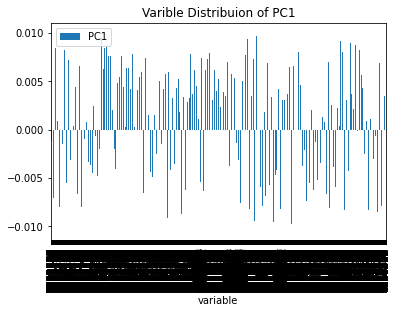

In [18]:
# can not be large due to limited menmory 
pca1df.plot.bar()
plt.title('Varible Distribuion of PC1')
plt.savefig('Varible Distribuion of PC1.png')
plt.show()

In [ ]:
# remove the greater symbol 
os_pGSE66525['characteristics_ch1.9.os'] = os_pGSE66525['characteristics_ch1.9.os'].str.replace('>', '')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


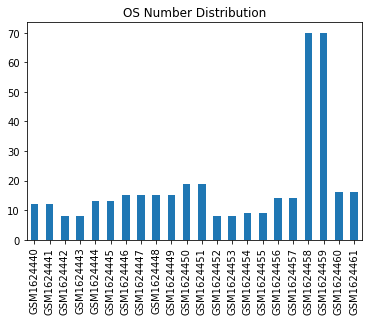

In [ ]:
osbar = os_pGSE66525['characteristics_ch1.9.os'].astype(float)
osbar.plot.bar()
plt.title('OS Number Distribution')
plt.show()

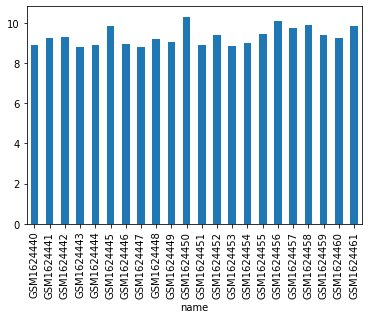

In [ ]:
# test 
new_tGSE66525[7893039].plot.bar() 

In [ ]:
type(pca1df)

pandas.core.frame.DataFrame

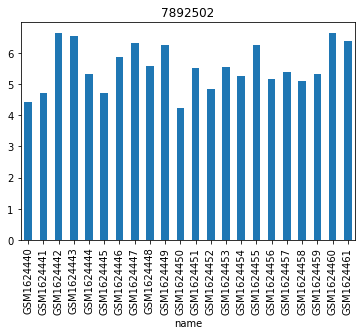

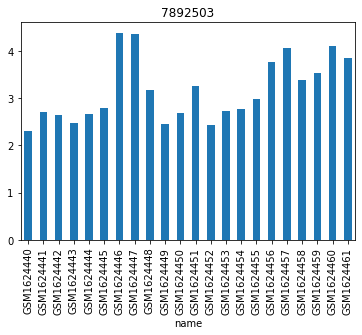

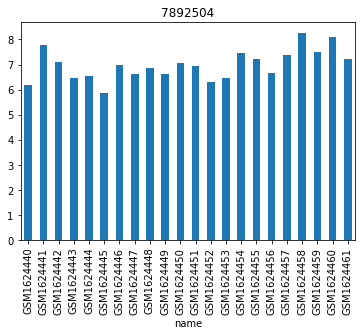

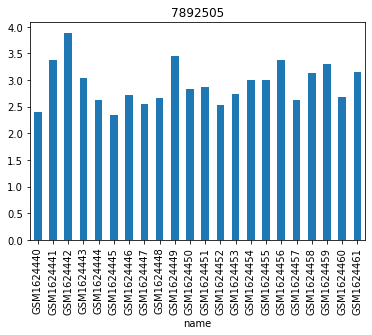

In [ ]:
# print the expresion level of genes that has highest PCA score in PC1
for i in pca1df.index.tolist()[1:5]:
  new_tGSE66525[i].plot.bar()
  plt.title(i)
  plt.show() 

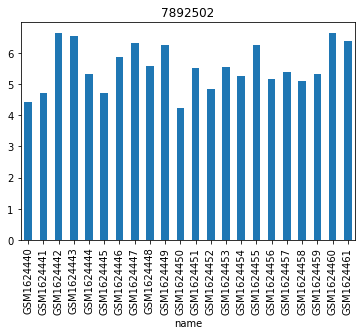

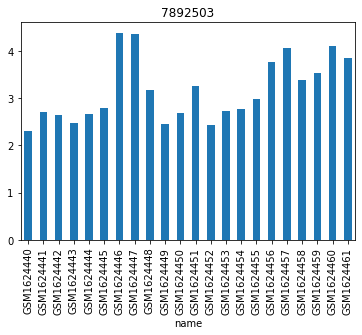

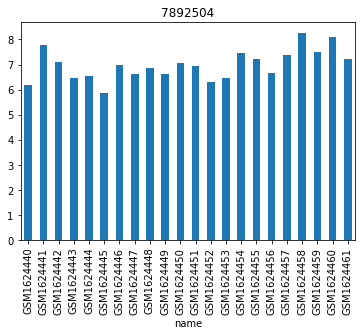

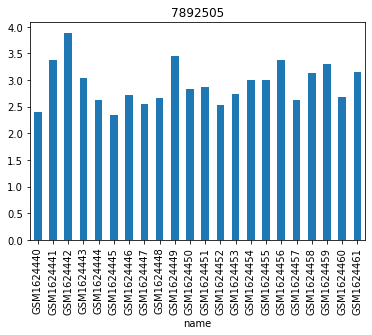

In [ ]:
# print the expresion level of genes that has highest PCA score in PC2

for i in pca2df.index.tolist()[1:5]:
  new_tGSE66525[i].plot.bar()
  plt.title(i)
  plt.show() 